# Taller Machine Learning 00 - Analítica de Datos

#### Pontificia Universidad Javeriana, Ingeniería de Sistemas
#### David Santiago Barreto Mora
#### 09/10/2023 (dd/mm/yyyy)
---

# Aplicación de algoritmos de machine learning
- Clasificador Random Forest
- Clasificador de descenso de gradiente estocástico (SGD)
- Clasificador de soport vectorial

Se usará validación cruzada como técnica de evaluación para los modelos propuestos e implementados:

- Grid Search CV
- Punctuation CV

**Objetivo:** Comparar los diferentes modelos de ML para la calidad del vino. La idea principal es jugar con clasificación binaria.

## Primera Parte. Preprocesamiento de datos.
El dataset sobre el cual trabajaremos trata sobre la calidad de muestras de vino. Para analizarlo, primero importamos las librerías necesarias y también la fuente de datos.

In [1]:
# 1.a Importación de librerías necesarias para el desarrollo del taller
# Métodos matemáticos y manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos y gráficos
import matplotlib.pyplot as plt # Visualización de datos
import seaborn as sns   # Graficos estadísticos

from sklearn.preprocessing import StandardScaler, LabelEncoder #Normalización de datos y codificación de variables categóricas

### Carga de datos

In [2]:
# Url con los datos
url = "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/main/Varios/winequality-red.csv"

# Creación del dataframe con la url
wineDF = pd.read_csv(url, sep=";")

# Inspección visual del dataframe
wineDF.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Ahora se presenta información general de los datos.

In [3]:
# Nombres de las columnas
wineDF.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
# Columnas y sus tipos de datos
wineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Observaciones
El dataset presenta información sobre calidad de vino con respecto a diferentes atributos del mismo. Son 1599 registros en total, de los cuales, no hay ni un solo dato nulo o faltante en alguna de las columnas. Esto probablemente indica que los datos fueron previamente pre-procesados o limpiados. 

Además de lo anterior, todas las columnas son de tipo númerico, ya sea de tipo decimal (float) o entero (int); la única columna con valores enteros siendo la columna de la calidad del vino (quaity), por lo que no será necesario hacer transformaciones a los tipos de datos.

El único "pero" del dataset es que los nombres de las columnas pueden ser limpiadas aún más. La mayoría tiene espacios, los cuales serán removidos más adelante.

---

In [5]:
# Reemplazamos los nombres de las columnas por kamelcase
wineDF.columns = ['fixedAcidity', 'volatileAcidity', 'citricAcid', 'residualSugar',
       'chlorides', 'freeSulfurDioxide', 'totalSulfurDioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']


### Gráficas. "Una gráfica dice más que mil palabras". 
A continuación graficamos cada una de las características del vino contra su calidad. 

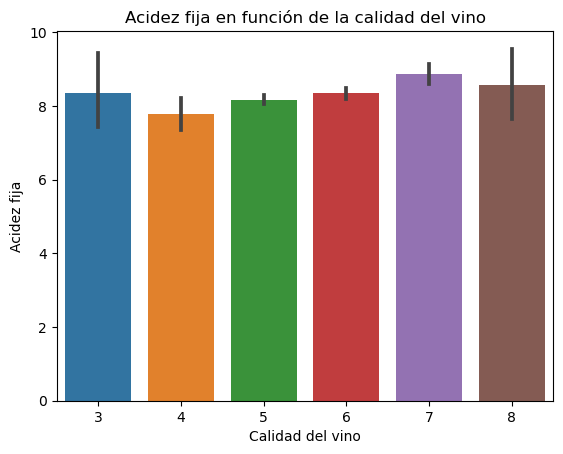

In [6]:
# 1. Acidez fija contra calidad del vino

sns.barplot(x='quality', y = 'fixedAcidity',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Acidez fija")

plt.title("Acidez fija en función de la calidad del vino")
plt.show()


En este gráfica se puede ver que encima de cada una de las barras hay un linea gris. Estas lineas son llamadas *barras de error, o 'error bars'.* 

Estas representan la variabilidad o dispersión de los valores. Entre más pequeña sea la barra, más cercanos son los valores a la media de esa categoría, y visceversa. Esto no quiere decir que siempre busquemos una barra de error pequeña; **las barras de error no son un indicador de la validez de los datos.** Lo que nos comunica esta barra es que tan confiable es la media como valor significativo en nuestros datos, ya que es perfectamente normal tener datos variables.

Esta barras las veremos en todas las demás gráficas.

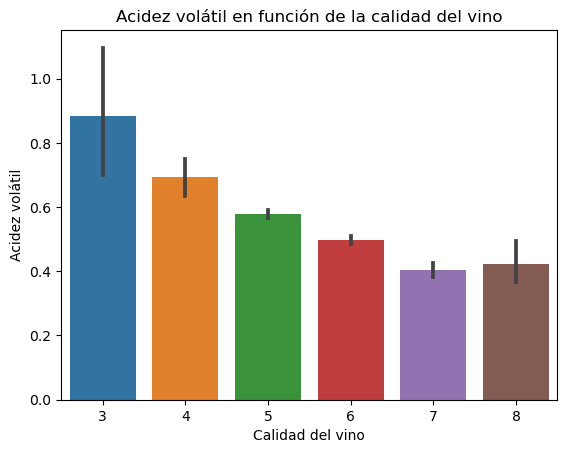

In [7]:
# 2. Acidez volátil contra calidad del vino

sns.barplot(x='quality', y = 'volatileAcidity',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Acidez volátil")

plt.title("Acidez volátil en función de la calidad del vino")
plt.show()

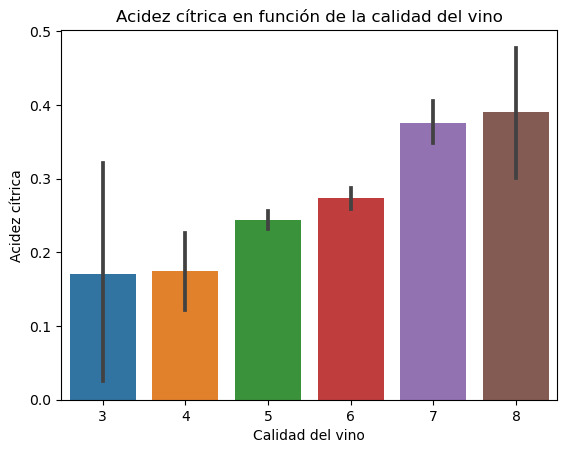

In [8]:
# 3. Acidéz cítrica contra calidad del vino

sns.barplot(x='quality', y = 'citricAcid',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Acidez cítrica")

plt.title("Acidez cítrica en función de la calidad del vino")
plt.show()

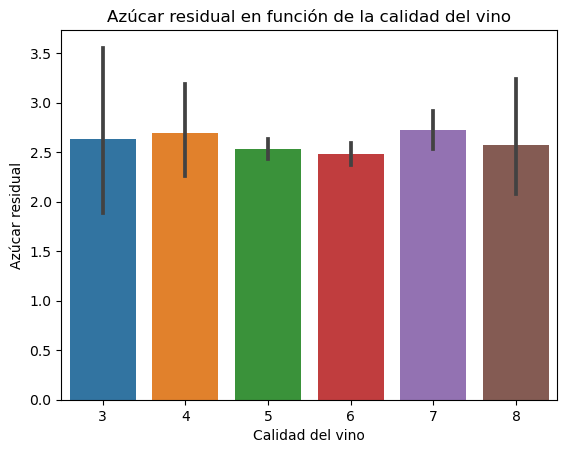

In [9]:
# 4. Azúcar residual contra calidad del vino

sns.barplot(x='quality', y = 'residualSugar',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Azúcar residual")

plt.title("Azúcar residual en función de la calidad del vino")
plt.show()

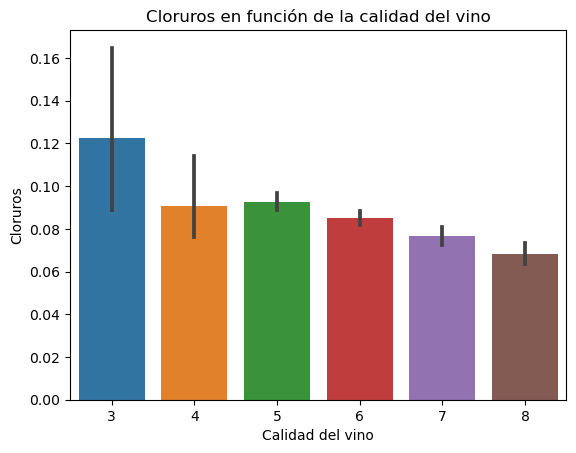

In [10]:
# 5. Cloruros contra calidad del vino

sns.barplot(x='quality', y = 'chlorides',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Cloruros")

plt.title("Cloruros en función de la calidad del vino")
plt.show()

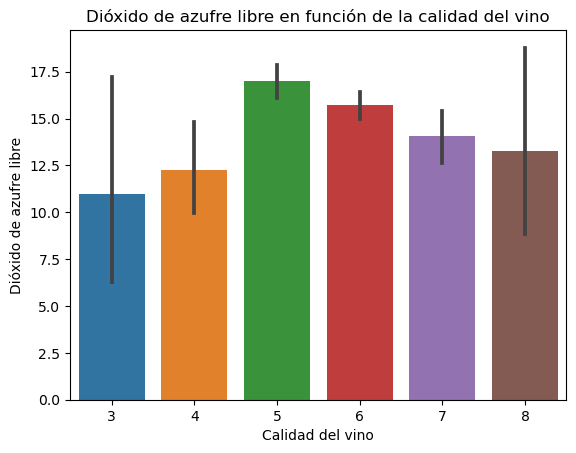

In [11]:
# 6. Dióxido de azufre libre contra calidad del vino

sns.barplot(x='quality', y = 'freeSulfurDioxide',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Dióxido de azufre libre")

plt.title("Dióxido de azufre libre en función de la calidad del vino")
plt.show()

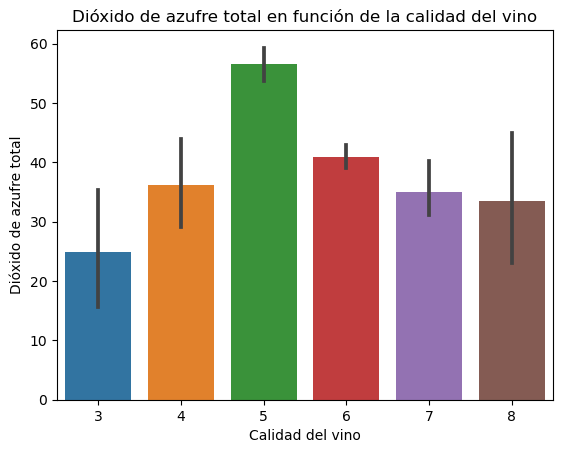

In [12]:
# 7. Dióxido de azufre total contra calidad del vino

sns.barplot(x='quality', y = 'totalSulfurDioxide',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Dióxido de azufre total")

plt.title("Dióxido de azufre total en función de la calidad del vino")
plt.show()


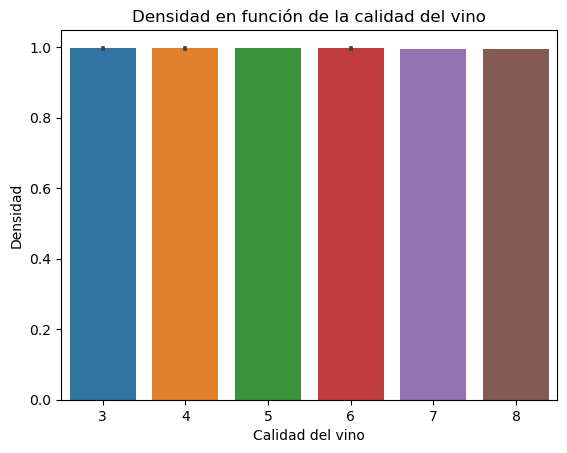

In [13]:
# 8. Densidad contra calidad del vino

sns.barplot(x='quality', y = 'density',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Densidad")

plt.title("Densidad en función de la calidad del vino")
plt.show()

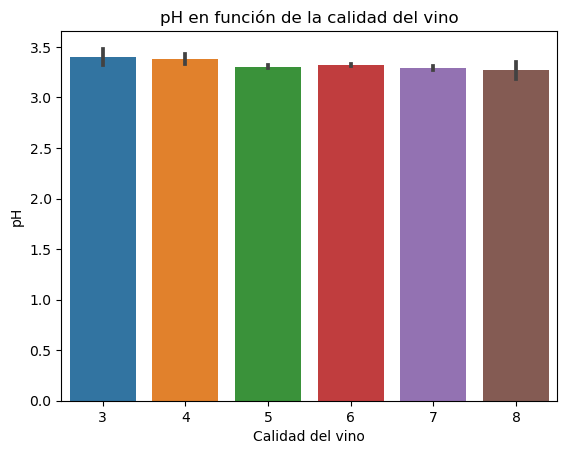

In [14]:
# 9. pH contra calidad del vino

sns.barplot(x='quality', y = 'pH',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("pH")

plt.title("pH en función de la calidad del vino")
plt.show()

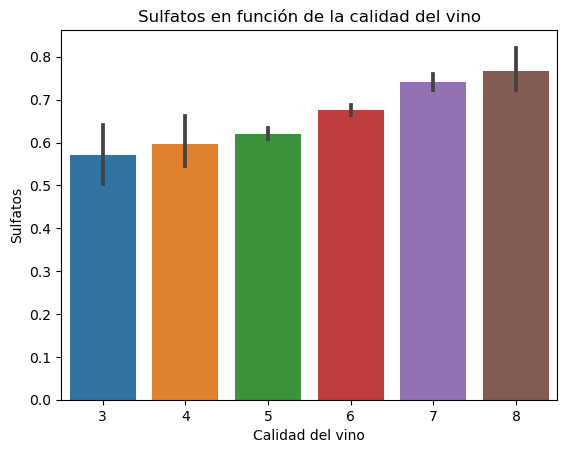

In [15]:
# 10. Sulfatos contra calidad del vino

sns.barplot(x='quality', y = 'sulphates',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Sulfatos")

plt.title("Sulfatos en función de la calidad del vino")
plt.show()


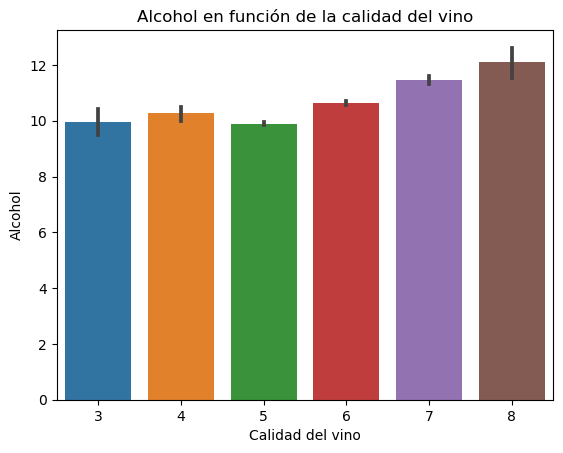

In [16]:
# 11. Alcohol contra calidad del vino

sns.barplot(x='quality', y = 'alcohol',data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Alcohol")

plt.title("Alcohol en función de la calidad del vino")
plt.show()

Por último pero menos importante, miramos los valores posibles para la columna de calidad. Esto es clave para los módelos a ser aplicados más adelante.

In [17]:
# 12. Valores para la columna de calidad del vino

wineDF['quality'].unique()


array([5, 6, 7, 4, 8, 3])

In [18]:
# Numero de valores para número para la cada calidad del vino
wineDF['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

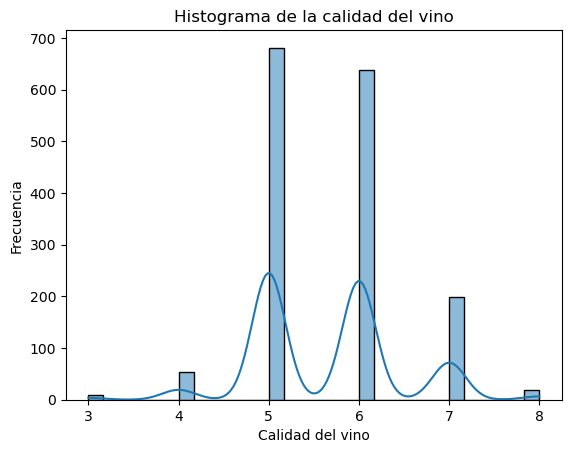

In [19]:
# También presentamos un histrograma de la variable calidad del vino

sns.histplot(data=wineDF, x="quality", kde=True)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Frecuencia")

plt.title("Histograma de la calidad del vino")
plt.show()

Podemos apreciar que la calidad del vino solo tiene valores discretos. 

Más importantemente, con el histograma podemos apreciar que la calidad del vino pareciera tener una **distribución normal**. La mayoría de vinos tienen una calidad "normal" (categorías 5 y 6), y hacia la izquierda y derecha de estos valores las frequencias disminuyen considerablemente.

### Datos nulos y valores duplicados.
A continuación presentamos la cantidad de datos nulos y duplicados.

In [20]:
# Datos nulos del dataframe
print("Cantidad de datos nulos por columna:")
wineDF.isnull().sum()


Cantidad de datos nulos por columna:


fixedAcidity          0
volatileAcidity       0
citricAcid            0
residualSugar         0
chlorides             0
freeSulfurDioxide     0
totalSulfurDioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

In [21]:
# Datos duplicados del dataframe
print("Cantidad de datos duplicados en el dataframe:", wineDF.duplicated().sum())

Cantidad de datos duplicados en el dataframe: 240


Podemos ver que de los 1599 datos, hay 240 datos repetidos, y un 0 datos nulos, confirmando lo que dijimos más arriba. 

***Nota: Se toma la decisión de dejar los datos duplicados con el fin de comparar el rendimiento de los modelos cuando hay datos duplicados y cuando no hay.***

---

## Segunda Parte. Codificación y preparación para los módelos de Machine Learning

Para hacer la división en binario, se harán dos categorias (etiqueta), bueno y malo. Estas dos clases se definirán entre:
- **['Malo']: 3 - 6.5.** Los vinos cuya calidad estén en este interalo serán categorizados como malos. 
- **['Bueno']: 6.5 - 8.**. De la misma forma, los vinos con calidad en este intervalo serán buenos.

Con estos rangos de valores debemos tener presente la distribución de los valores vista más arriba. La gran mayoría de vinos tienen una calidad de 5 o 6 (Categoria 'Malo'), por lo que es de esperar que muchós más vinos sean etiquetados como 'Malos'.

Con esto en mente, ahora re-escribirimos la columna 'quality', la cual es nuestra columna o variable objetivo. La reescribiremos con los valores dados arriba.

In [22]:
etiquetas = ['Malo', 'Bueno']
intervalos = (2, 6.5, 8)

# Creamos un nuevo dataframe con  los valores de la columna calidad por reemplazados por las etiquetas
wineDF['quality'] = pd.cut(wineDF['quality'], bins=intervalos, labels=etiquetas)


In [23]:
wineDF.head(5)

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Malo
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Malo
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Malo
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Malo
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Malo


In [24]:
# Nuevos valores para la columna calidad del vino
wineDF['quality'].value_counts()

Malo     1382
Bueno     217
Name: quality, dtype: int64

In [25]:
# Se crea un objeto de tipo codificador de etiquetas
codificador = LabelEncoder()

Ahora ajustamos y codificamos los valores en forma binaria:
- 1: Malo
- 0: Bueno.

In [26]:
# Se codifica la columna calidad del vino. 0 para malo y 1 para bueno
wineDF['quality'] = codificador.fit_transform(wineDF['quality'])


In [27]:
wineDF.head(5)

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [28]:
wineDF['quality'].value_counts()

1    1382
0     217
Name: quality, dtype: int64

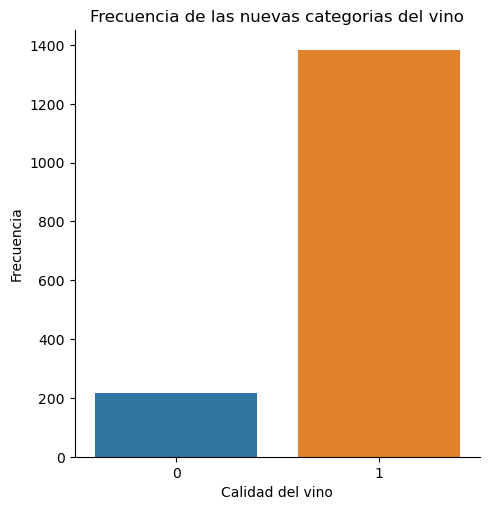

In [29]:
sns.catplot(x="quality", kind="count", data=wineDF)

# Cambiamos los nombres de los ejes
plt.xlabel("Calidad del vino")
plt.ylabel("Frecuencia")

plt.title("Frecuencia de las nuevas categorias del vino")
plt.show()

### Particionamiento de los datos entre entrenamiento y prueba.
Para hacer la partición importamos las librerías necesarias.

In [30]:
# Librería para para particionar los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# También se importan las librerías de validación cruzada 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


Y usamos el split estándar de 80-20 para datos de entrenamiento y datos de prueba.

In [41]:
# X = variables independientes
# y = variable dependiente sobre la cual queremos trabajar

X = wineDF.drop('quality', axis=1)
y = wineDF['quality']

# Particionamos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print("Datos de entrenamiento:", X_train.shape)
print("Datos de prueba totales:", X_test.shape)

Datos de entrenamiento: (1279, 11)
Datos de prueba totales: (320, 11)
Datos de prueba por clase: (320,)


Ahora aplicamos el escalamiento estándard (normalización) para optimización de los resultados. Hacemos esta estandarización para garantizar que se le da igual importancia a los datos que tienen diferente dimensionalidad. Si no hacemos esto, es muy probable que se le de más importancia a los datos con mayor dimensionalidad.

También se debe mencionar que este proceso no siempre debe ser aplicado. Suele ser un buen guideline aplicarlos solo en datos con dimensionalidad distinta.

In [32]:
normalizador = StandardScaler()

In [33]:
# Solo a los datos de las variables independientes (prueba y entrenamiento) se les hace la normalización
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.fit_transform(X_test)

### Clasificador Random forest
Ya teniendo los datos particionados y estandarizados, importamos y aplicamos el modelo random forest.

In [34]:
# Se importan los modelos de clasificación
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Support Vector Machine
from sklearn.svm import SVC


In [35]:
# Creación del modelo ranfom forest
modeloRF = RandomForestClassifier(n_estimators=200)

# Ajuste del modelo
modeloRF.fit(X_train, y_train)

# Predicción del modelo
pred_RF = modeloRF.predict(X_test)


#### Métricas de desempeño

Importamos todas las métricas de desempeño para evaluar el modelo.

In [36]:
# Métricas de evaluación del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

Ahora presentamos las métricas de desempeño del modelo.

##### Reporte de clasificación

In [37]:
print(f"Reporte de Métricas de desempeño del modelo Random Forest:\n{classification_report(y_test, pred_RF)}")

Reporte de Métricas de desempeño del modelo Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.56      0.68        48
           1       0.93      0.98      0.95       272

    accuracy                           0.92       320
   macro avg       0.89      0.77      0.81       320
weighted avg       0.91      0.92      0.91       320



**Precisión:**

- La precisión para la clase "0" (buena calidad) es de 0,84, lo que significa que cuando el modelo predice un vino como de "buena calidad", acierta el 84% de las veces. De igual forma para la clase 1.
- El modelo tiene una precisión alta para ambas clases, lo que significa que cuando hace una predicción, a menudo acierta. 

**Recall:**

- La recuperación de la clase "0" (buena calidad) es de 0,56, lo que indica que el modelo identifica correctamente el 56% de los vinos de "buena calidad". Lo mismo para la clase 1.
- El modelo tiene un excelente recall para la clase "mala calidad", captando casi todos los vinos reales de "mala calidad". Sin embargo, el recuerdo de la clase "buena calidad" notoriamente inferior, sugiriendo que el modelo pasa por alto una parte significativa de los vinos de "buena calidad".

**Puntuación F1:**

Las puntuaciones F1 tienen en cuenta tanto la precisión como la recuperación. La puntuación F1 de la clase "mala calidad" es alta, lo que indica un buen equilibrio entre precisión y recuperación. Sin embargo, para la clase de "buena calidad", la puntuación F1 es más baja, debido al bajo recall de la clase.

**Precisión global:**

La precisión global del modelo es de 0,92, lo que significa que el 92% de las predicciones en ambas clases son correctas.
El modelo tiene una precisión global alta, pero es importante tener en cuenta el desequilibrio de clases en el conjunto de datos. La alta precisión podría deberse a la clase mayoritaria ("mala calidad"), mientras que el modelo podría tener problemas con la clase minoritaria ("buena calidad"), como es evidenciado en el bajo recall de los vinos malos.





##### Matríz de confusión

Matriz de confusión:
[[ 27  21]
 [  5 267]]


Text(50.722222222222214, 0.5, 'Valores reales')

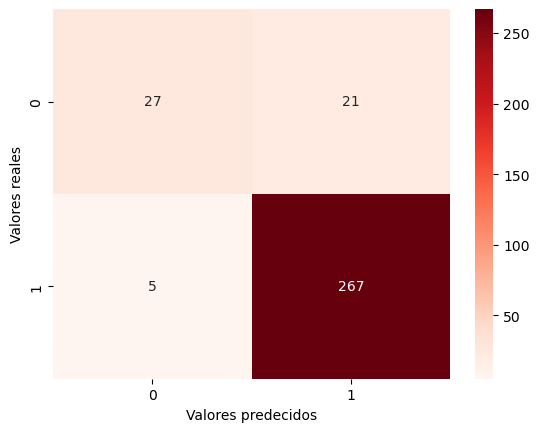

In [42]:
# Mostramos gráficamente la matriz de confusión

matriz_confusion = confusion_matrix(y_test, pred_RF)

sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Reds")

# Imprimimo los valores de la matriz de confusión
print("Matriz de confusión:")
print(matriz_confusion)

# Cambiamos los nombres de los ejes
plt.xlabel("Valores predecidos")
plt.ylabel("Valores reales")



La casilla superior izquierda (27) representa el número de vinos de "buena calidad" (clase 0) que el modelo clasificó correctamente como de "buena calidad". Esto se conoce como Verdaderos Positivos (TP).

La casilla superior derecha (21) representa el número de vinos de "buena calidad" (clase 0) que el modelo clasificó incorrectamente como de "mala calidad". Esto se conoce como Falsos Negativos (FN).

La casilla inferior izquierda (5) representa el número de vinos de "mala calidad" (clase 1) clasificados erróneamente como de "buena calidad" por el modelo. Esto se conoce como falsos positivos (FP).

La casilla inferior derecha (267) representa el número de vinos de "mala calidad" (clase 1) clasificados correctamente como de "mala calidad" por el modelo. Esto también se conoce como Verdaderos Positivos (TP).

Podemos ver claramente que el modelo clásifica correctamente la gran mayoría de vinos malos. Esto, de nuevo probablemente se deba al desbalance de datos.

##### Curva ROC y valor AUC

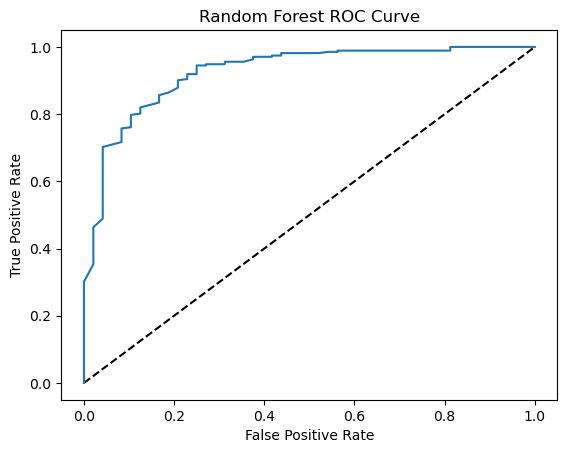

In [124]:
# Imprimimos la gráfica de la curva ROC
y_pred_prob = modeloRF.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()


#### Conclusiones

- El conjunto de datos presenta una distribución normal, lo que proporciona un contexto valioso para la interpretación de los datos. 

- El modelo Random Forest mostró un rendimiento sólido, alcanzando unas métricas de exactitud, precisión y recuperación aceptables. Destacó en la identificación correcta de vinos de "mala calidad", lo cual puede ser atribuido al notable desequilibrio de clases, con más muestras de "buena calidad" que de "mala calidad". Este desequilibrio influyó en el rendimiento del modelo, favoreciendo a la clase mayoritaria.

- Para mejorar el rendimiento, se debería abordar el desequilibrio de clases mediante el remuestreo, ponderación de pesos, o cambio en los intervalos de las clases. Desde el principio se pudo ver un claro desbalance de datos nada más por la forma en la que se escogieron los intervalos de decisión para la calidad del vino.



## Tercera parte. 